# Compare uncertainties from old framework and updated framework

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.10/04


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")



In [3]:
# Note : The old numbering scheme starts from 0, new starts from 1

oldfile = ROOT.TFile('mcvariations_softdrop_PAS_4.root')
newfile = ROOT.TFile('uncertainties_softdrop5.root')

In [4]:
sysvars = ['jec', 'jer', 'jmr', 'jms', 'pu', 'lum', 'pdf', 'ps', 'stat', 'tot']

In [5]:
c_old = oldfile.Get("cdist4SD")

hists_old = dict( zip( sysvars , [
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jes'),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jes'),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jmr'),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_jmr'),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_pu'),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_stat'),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_pdf'),
    c_old.GetPrimitive('mcvariations_softdrop_PAS_ps'),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_stat'),    
    c_old.GetPrimitive('mcvariations_softdrop_PAS_tot'),    
]))

In [6]:
c_new = newfile.Get("cunc5softdrop")

hists_new = dict( zip( sysvars , c_new.GetPrimitive("2d_response_softdrop_nomnom__jec_uncstack5").GetHists()))

hists_new

{'jec': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom__jecsoftdrop5") at 0x7fdffb5760f0>,
 'jer': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom__jersoftdrop5") at 0x7fdffb5d57f0>,
 'jmr': <ROOT.TH1D object ("proj_2d_response_softdrop_jmrnom__jmrsoftdrop5") at 0x7fdffb5d5ee0>,
 'jms': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom__jmssoftdrop5") at 0x7fdffb5d6750>,
 'lum': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom_lumsoftdrop5") at 0x7fdffb5d79e0>,
 'pdf': <ROOT.TH1D object ("proj_2d_response_softdrop_pdfsoftdrop5") at 0x7fdffb5d8310>,
 'ps': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom_pssoftdrop5") at 0x7fdffb5d8c80>,
 'pu': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom__pusoftdrop5") at 0x7fdffb5d7070>,
 'stat': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom_mcStatsoftdrop5") at 0x7fdffb5d95f0>,
 'tot': <ROOT.TH1D object ("proj_2d_response_softdrop_nomnom_totuncsoftdrop5") at 0x7fdffb5d9f50>}

AttributeError: 'TObject' object has no attribute 'SetLineStyle'

Info in <TCanvas::Print>: png file unc_compare_softdrop_5_jec.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_jec.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_jer.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_jer.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_jmr.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_jmr.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_jms.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_jms.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_pu.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_pu.pdf has been created
Info in <TCanvas::Print>: png file unc_compare_softdrop_5_lum.png has been created
Info in <TCanvas::Print>: pdf file unc_compare_softdrop_5_lum.pdf has been created
Info i

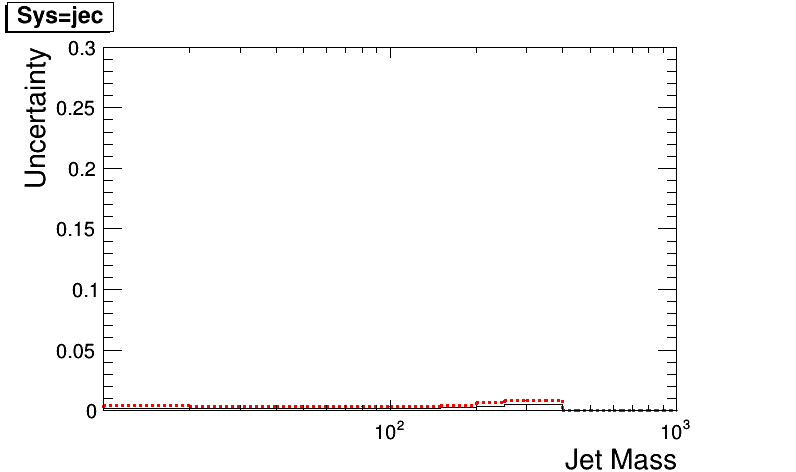

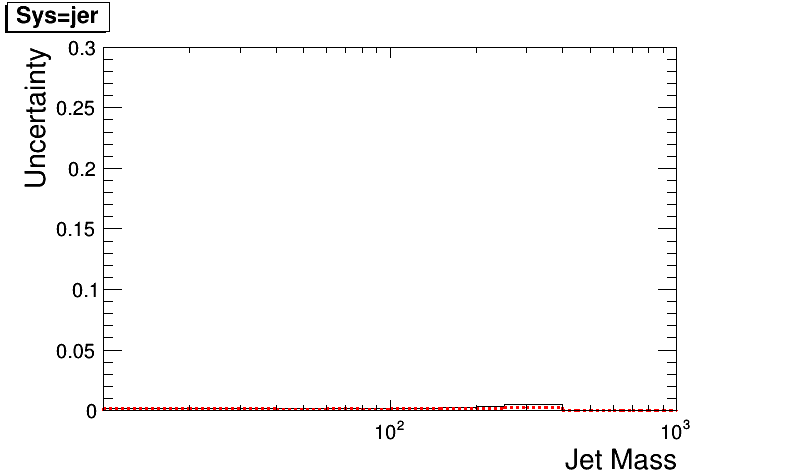

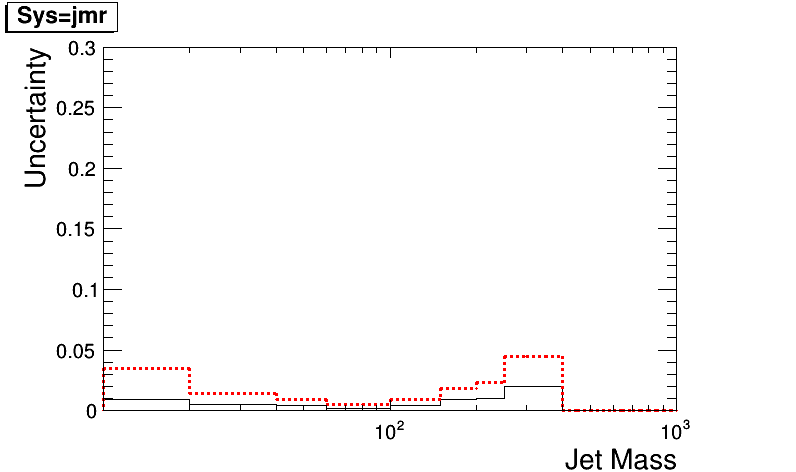

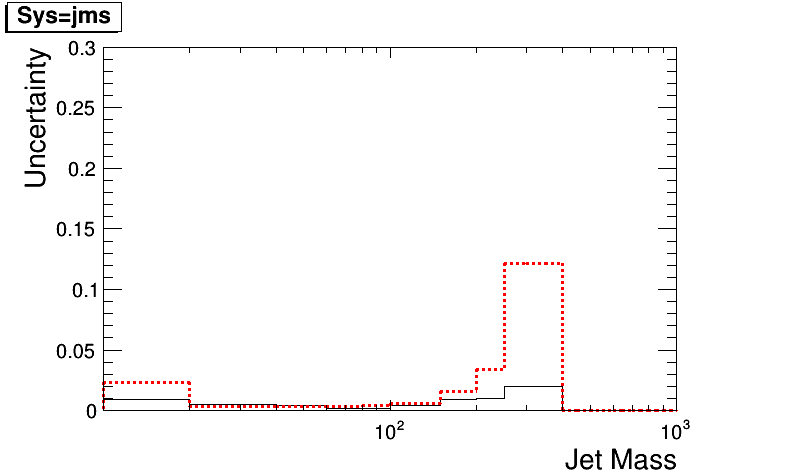

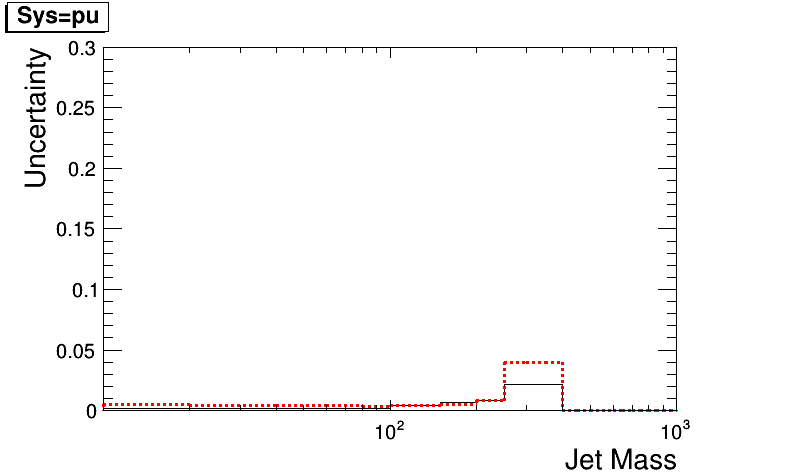

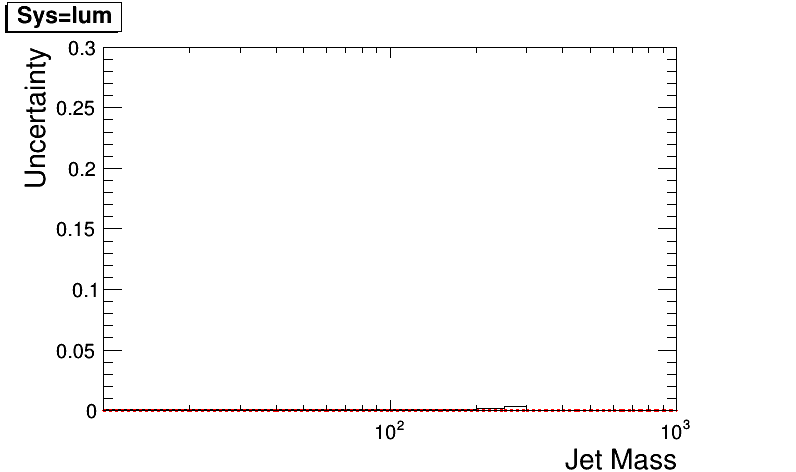

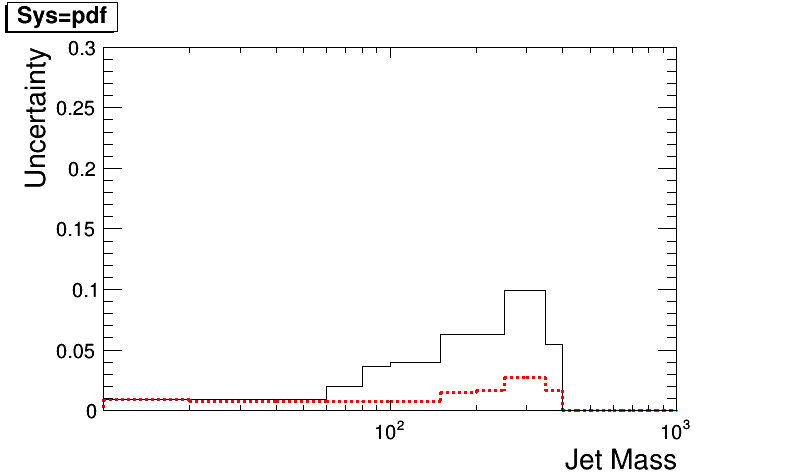

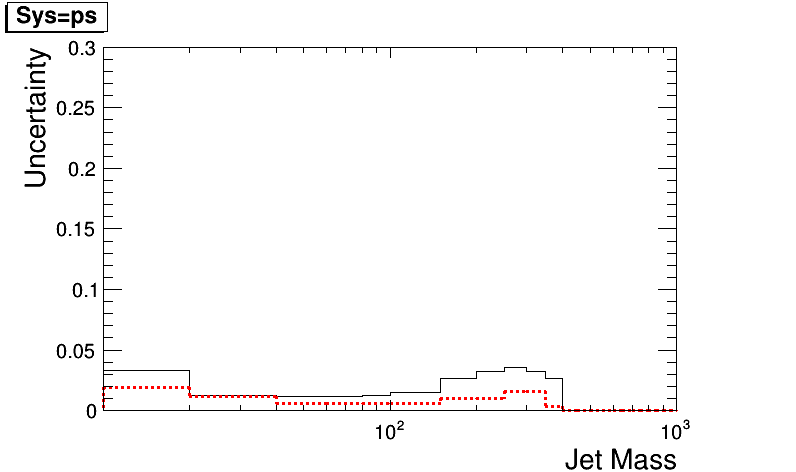

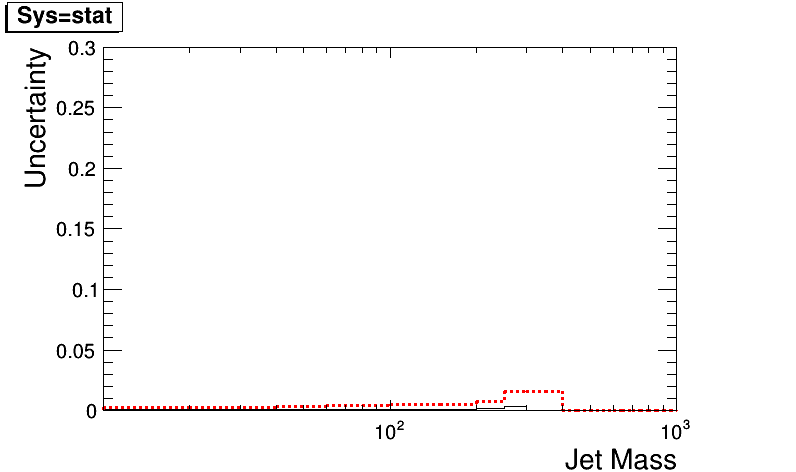

In [7]:
canvs = []
stacks = []


for isys in sysvars :
    c = ROOT.TCanvas("canv_" + isys, "canv_" + isys)
    s = ROOT.THStack("stack_" + isys, 'Sys=' + isys + ';Jet Mass;Uncertainty')
    hold = hists_old[isys]
    hnew = hists_new[isys]
    hold.SetLineStyle(1)
    hold.SetLineColor(1)
    hnew.SetLineStyle(2)
    hnew.SetLineColor(2)
    s.Add(hold)
    s.Add(hnew)
    s.Draw("nostack hist")
    s.SetMaximum(0.3)
    s.GetXaxis().SetRangeUser(10.,1000.)
    c.SetLogx()
    c.Draw()    
    canvs.append(c)
    stacks.append(s)
    c.Print("unc_compare_softdrop_5_" + isys + ".png", "png")
    c.Print("unc_compare_softdrop_5_" + isys + ".pdf", "pdf")